#### Imports and paths setting

In [2]:
from datetime import datetime
import warnings
warnings.filterwarnings(action="ignore")
import os, sys
PACKAGE_ROOT = os.path.dirname(os.path.abspath(""))
print(PACKAGE_ROOT)
sys.path.insert(0, PACKAGE_ROOT)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import BlockChain, Node
from src.helper import prepare_data_n, create_plots_n, prepare_data_k, create_plots_k


# path for input and output files
INPUT_DIR = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\inputs"
OUTPUT_DIR = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs"
INPUT_FILE_PATH = os.path.join(INPUT_DIR, "input.txt")
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, "output.txt")

c:\Users\sharm\Documents\workspace\gitworks\basic-blockchain
nonce upper limit: 16777216


### PART 1
Below code reads the input parameters from the file stored at INPUT_FILE_PATH.

After reading params, it runs the steps given in 'Procedure' section of assignment.

The logs are created and shown in console as well as in outputs.txt file.\

For below code purpose, n=10, m=10, k=4.
You can change these params from inputs/input.txt file.

In [ ]:
# initialize the block chain and create a genesis block
blockchain = BlockChain()
# read inputs from a file
with open(INPUT_FILE_PATH, "r") as fr:
    content = [int(num) for num in fr.readline().strip().split()]
    n, m, k = content

with open(OUTPUT_FILE_PATH, "w") as fw:
    nodes = [Node(blockchain, i+1) for i in range(n)]
    block_proposers = {"round": [], "process": [], "block": []}
    for round in range(m):
        print(f"Round {round+1}: ")
        fw.write(f"Round {round+1}: \n")
        for idx, node in enumerate(nodes):
            res = node.propose_block(f"Node id: {node.id}", k)
            if res:
                block_proposers["round"].append(round+1)
                block_proposers["process"].append(idx+1)
                block_proposers["block"].append(blockchain.chain[-1])
                print(f"Process: {idx+1}")
                fw.write(f"Process: {idx+1}\n")
                print("Block: ")
                fw.write("Block: \n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(f"Nonce: {blockchain.chain[-1].nonce}")
                fw.write(f"Nonce: {blockchain.chain[-1].nonce}\n")
                print(f"Timestamp: {blockchain.chain[-1].current_timestamp}")
                fw.write(f"Timestamp: {blockchain.chain[-1].current_timestamp}\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print(".".center(10, " "))
                fw.write(".".center(10, " ") + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")
                print("-"*10)
                fw.write("-"*10 + "\n")

### PART 2

#### 2.a
Below code runs the experiment where it changes the number of nodes (n) to observe the impact of n on the count of proposers.

Below is the code where we vary number of nodes n, keeping k fixed. 

The code runs for 'n' = {5, 10, 15, ..., 100}, keeping 'k' fixed at 4 for 10 rounds each.

In [ ]:
# EXPERIMENT 1 - VARY THE NUMBER OF NDOES IN THE SYSTEM KEEPING k fixed
# generate different number of nodes
Ns = np.arange(start=5, stop=101, step=5)
# number of rounds
m = 10
# difficulty param
k = 4
# initialize as dict to make dataframe later
block_proposers = {"n": [], "round": [], "process": [], "block": [], "k": []}
# main loop
for n in Ns:
    blockchain = BlockChain()
    print(f"n: {n}")
    nodes = [Node(blockchain, i+1) for i in range(n)]
    for round in range(m):
        print(f"Round {round+1}: ")
        for idx, node in enumerate(nodes):
            # tic = time.time()
            res = node.propose_block(f"Node id: {node.id}", k)
            # print(f"Time taken: {time.time() - tic} seconds")
            if res:
                # block_proposers["round"].append((round+1, idx+1, blockchain.chain[-1]))
                block_proposers["round"].append(round+1)
                block_proposers["process"].append(idx+1)
                block_proposers["block"].append(blockchain.chain[-1])
                block_proposers["n"].append(n)
                block_proposers["k"].append(k)

# Save the details of each iterations into a df as well as in a file
# bp_df = pd.DataFrame(block_proposers)[["n", "k", "round", "process"]]
# bpdfname = "BP_DF_VARYn_" + str(datetime.now()).replace(" ", "-").replace(":","-") + ".csv"
# bp_df.to_csv(os.path.join(OUTPUT_DIR, bpdfname), index=False)

##### 2.a Create plots

In [ ]:
file_path = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs\BP_DF_2023-04-18-23-36-55.158807.csv"
tmp_df2 = prepare_data_n(file_path)
create_plots_n(tmp_df2)

##### 2.a Observations
1. We observe that as we increase the number of nodes, block proposers count also increases, almost linearly. But this increase is slower than y=x line (left figure). 

2. We also observe that the percentage of block proposers fluctuate nearby 60% as we change number of nodes 'n'. But it does not change drastically.

### 2.b

Below code changes the value of k (difficulty parameter) to see the impact on the number of proposers block in the network.

We are varying k = {2, 4, 6, 8, 10}, keeping n = 10 and rounds = 10

In [ ]:
# Vary the difficulty by varying the value of k
Ks = np.arange(start=2, stop=11, step=2)
# rounds
m = 10
# number of nodes
n = 10
block_proposers = {"n": [], "round": [], "process": [], "block": [], "k": []}
for k in Ks:
    blockchain = BlockChain()
    print(f"k: {k}")
    nodes = [Node(blockchain, i+1) for i in range(n)]
    for round in range(m):
        print(f"Round {round+1}: ")
        for idx, node in enumerate(nodes):
            res = node.propose_block(f"Node id: {node.id}", k)
            if res:
                block_proposers["round"].append(round+1)
                block_proposers["process"].append(idx+1)
                block_proposers["block"].append(blockchain.chain[-1])
                block_proposers["n"].append(n)
                block_proposers["k"].append(k)

# Save the numbers in a file
# bp_df = pd.DataFrame(block_proposers)[["n", "k", "round", "process"]]
# bpdfname = "BP_DF_k_vary_n_10_nonce_2^32" + str(datetime.now()).replace(" ", "-").replace(":","-") + ".csv"
# bp_df.to_csv(os.path.join(OUTPUT_DIR, bpdfname), index=False)
# bp_df.head(2)

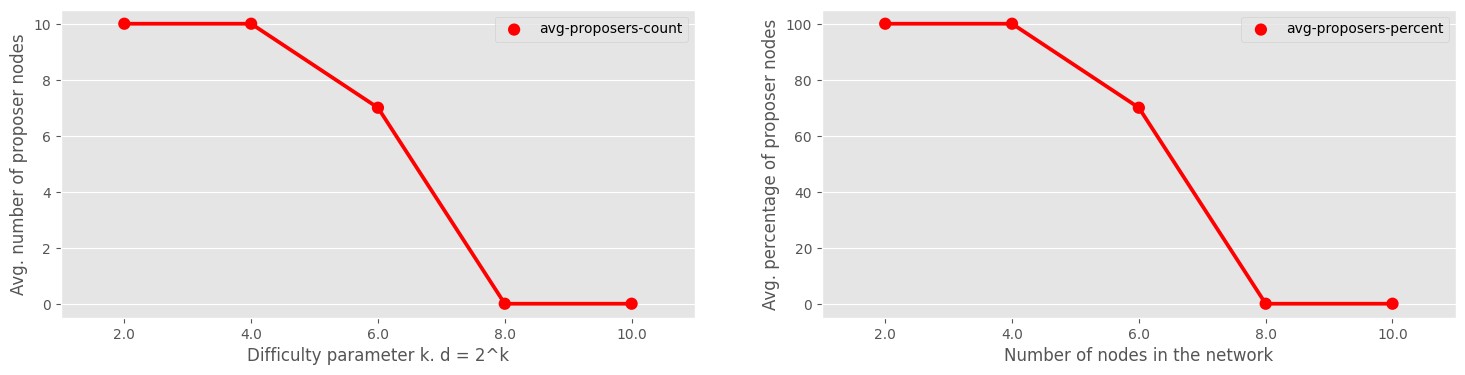

In [3]:
file_path = r"C:\Users\sharm\Documents\workspace\gitworks\basic-blockchain\outputs\BP_DF_k_vary_n_10_nonce_2^322023-04-19-02-01-38.284986.csv"
tmp_df2 = prepare_data_k(file_path)
Ks = np.arange(start=2, stop=11, step=2)
remaining_ks = set(Ks).difference(tmp_df2.k.unique())
for k in remaining_ks:
    record = {
        "n": 10, 
        "k": k, 
        "avg_propose_count": 0.0, 
        "percent_proposers": 0.0
    }
    tmp_df2 = tmp_df2.append(record, ignore_index=True)

create_plots_k(tmp_df2)